# Validate parquet files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plantclef.utils import get_spark

spark = get_spark()
display(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/06 16:56:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/06 16:56:31 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [3]:
# Get list of stored filed in cloud bucket
root = "gs://dsgt-clef-plantclef-2024"
! date
! gcloud storage ls {root}/data/parquet_files

Sat Apr  6 16:56:33 UTC 2024
gs://dsgt-clef-plantclef-2024/data/parquet_files/
gs://dsgt-clef-plantclef-2024/data/parquet_files/PlantCLEF2022_web_training_images_1/
gs://dsgt-clef-plantclef-2024/data/parquet_files/PlantCLEF2022_web_training_images_4/
gs://dsgt-clef-plantclef-2024/data/parquet_files/PlantCLEF2024_test/
gs://dsgt-clef-plantclef-2024/data/parquet_files/PlantCLEF2024_training/
gs://dsgt-clef-plantclef-2024/data/parquet_files/PlantCLEF2024_training_cropped_resized/
gs://dsgt-clef-plantclef-2024/data/parquet_files/PlantCLEF2024_training_cropped_resized_v2/


In [4]:
# Path and dataset names
gcs_path = "gs://dsgt-clef-plantclef-2024/data/parquet_files/"
train = "PlantCLEF2024_training_cropped_resized_v2"
test = "PlantCLEF2024_test"

# Define the GCS path to the Train parquet file
train_gcs_path = f"{gcs_path}{train}"
test_gcs_path = f"{gcs_path}{test}"

# Read the Parquet file into a DataFrame
train_df = spark.read.parquet(train_gcs_path)
test_df = spark.read.parquet(test_gcs_path)

# Show the data
train_df.show(n=5)
test_df.show(n=5)

+--------------------+--------------------+------+----------+----------+--------------------+-------+--------------------+--------+-------------+-------------+---------------+--------------------+----------+-------------+--------+-----------+--------------------+--------------------+---------+--------------------+--------------------+
|          image_name|                path| organ|species_id|    obs_id|             license|partner|              author|altitude|     latitude|    longitude|gbif_species_id|             species|     genus|       family| dataset|  publisher|          references|                 url|learn_tag|    image_backup_url|                data|
+--------------------+--------------------+------+----------+----------+--------------------+-------+--------------------+--------+-------------+-------------+---------------+--------------------+----------+-------------+--------+-----------+--------------------+--------------------+---------+--------------------+-----------

+--------------------+--------------------+--------------------+
|                path|          image_name|                data|
+--------------------+--------------------+--------------------+
|/PlantCLEF2024tes...|CBN-Pla-B4-201607...|[FF D8 FF E0 00 1...|
|/PlantCLEF2024tes...|CBN-Pla-D3-201308...|[FF D8 FF E0 00 1...|
|/PlantCLEF2024tes...|CBN-PdlC-E4-20150...|[FF D8 FF E0 00 1...|
|/PlantCLEF2024tes...|CBN-Pla-F5-201509...|[FF D8 FF E0 00 1...|
|/PlantCLEF2024tes...|CBN-Pla-D1-201807...|[FF D8 FF E0 00 1...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



### train images

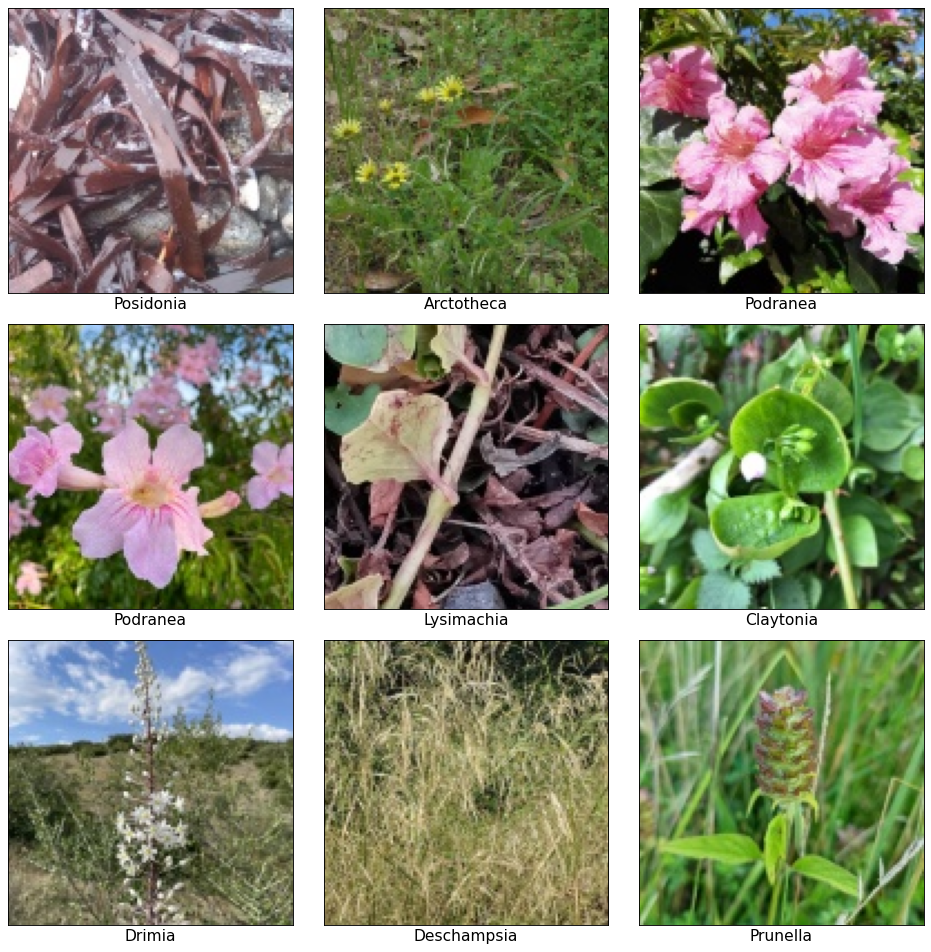

In [5]:
from plantclef.plotting import plot_images_from_binary

# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_df = train_df.limit(rows * cols).collect()
image_data_list = [row["data"] for row in subset_df]
binomial_names = [row["genus"] for row in subset_df]

# Display the images in a grid with binomial names
plot_images_from_binary(train_df, data_col="data", image_col="genus", grid_size=(3, 3))

In [6]:
train_df.count()

1408033

### test images

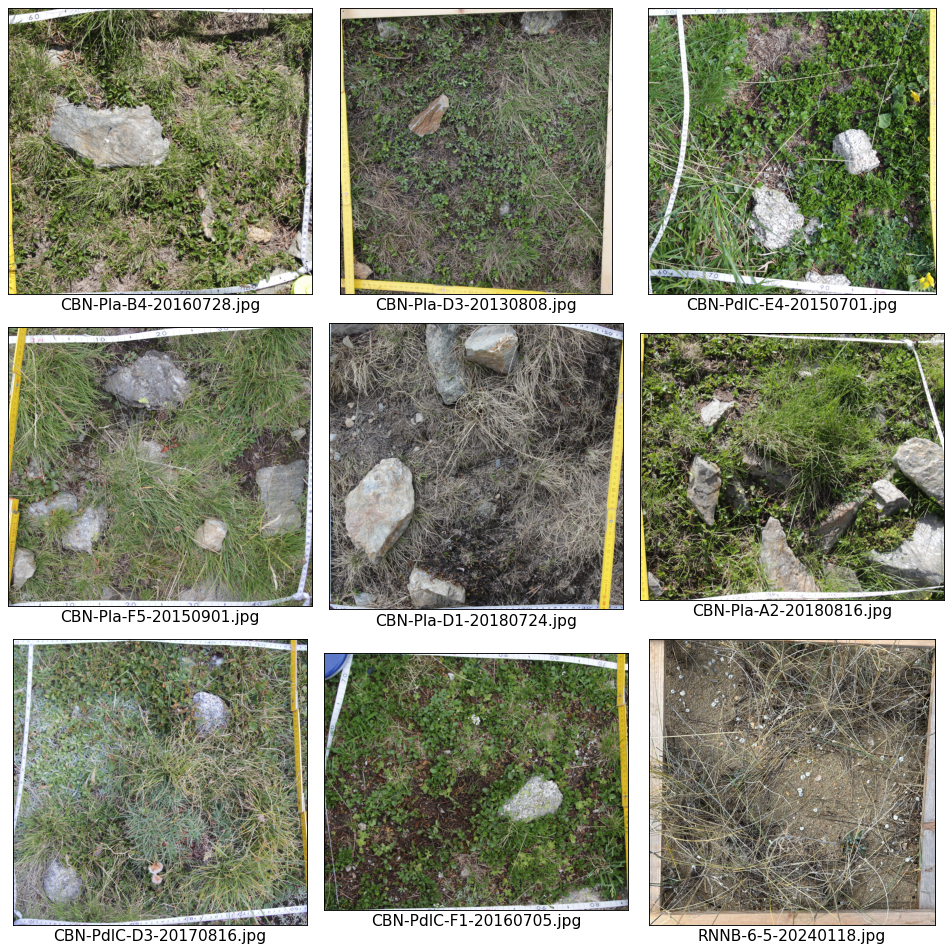

In [7]:
# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_df = test_df.limit(rows * cols).collect()
image_data_list = [row["data"] for row in subset_df]
image_names = [row["image_name"].replace(".jpg", "") for row in subset_df]

# Display the images in a grid with binomial names
plot_images_from_binary(
    test_df, data_col="data", image_col="image_name", grid_size=(3, 3)
)

In [8]:
test_df.count()

1695